In [ ]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get data 
df = pd.read_csv("/content/drive/MyDrive/Internship Projects/INSAID- Project/Fraud.csv")
print(df.shape)

(6362620, 11)


In [ ]:
# Checking for null values in the data frame
print(df.isnull().sum())
'''Zero null values present in the data'''

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


'Zero null values present in the data'

In [ ]:
# Get type transactions with count present in the data 
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
#Getting summary of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Remove column name Isflagfraud
df.drop("isFlaggedFraud", axis=1, inplace=True)

In [ ]:
#Checking for Duplicated values
print(df.duplicated())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool


(6362620, 10)

In [ ]:
# Transform Categorical Varibles in to Numerical Variables
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 4, 
                                 "CASH_IN": 2, "TRANSFER": 5,
                                 "DEBIT": 3})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     4   9839.64  C1231006815       170136.0       160296.36   
1     1     4   1864.28  C1666544295        21249.0        19384.72   
2     1     5    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     4  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


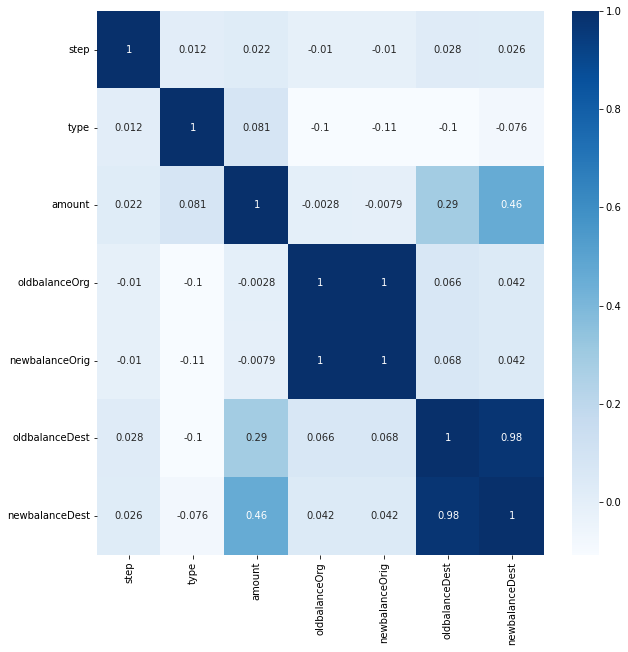

In [ ]:
#Plot heatmap to observe positive and negative correlation between variables

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
# Test positive and negative correlation by using Pearson’s correlation coefficient 

correlation_of_old_new_origin = np.corrcoef(df.oldbalanceOrg, df.newbalanceOrig)
print(correlation_of_old_new_origin)



[[1.         0.99880276]
 [0.99880276 1.        ]]


In [ ]:
correlation_of_old_new_origin_isfraud = np.corrcoef(df.newbalanceOrig, df.isFraud )
print(correlation_of_old_new_origin_isfraud)

In [ ]:

correlation_of_old_new_dest_isfraud = np.corrcoef(df.oldbalanceDest, df.isFraud )
print(correlation_of_old_new_dest_isfraud)

[[ 1.         -0.00588528]
 [-0.00588528  1.        ]]


'We can see that most of the fraud value lies between 0.0-0.5, there are outliers also(between 0.0-0.5).'

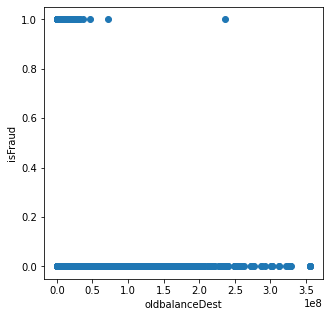

In [ ]:
# Finding patterns in oldbalanceDest and isFraud Variables

plt.figure(figsize=(5,5))
plt.scatter(x='oldbalanceDest',y='isFraud',data=df)
plt.xlabel('oldbalanceDest')
plt.ylabel('isFraud')

'''We can see that most of the fraud value lies between 0.0-0.5, there are outliers also(between 0.0-0.5).'''

'We can see that most of the fraud value lies between 0.0-1.5, there are outliers also(between 0.0-1.5).'

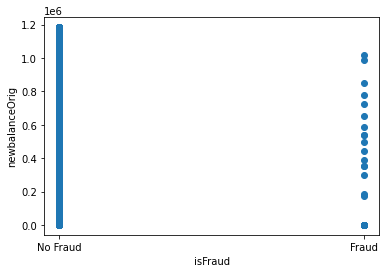

In [ ]:
# Finding patterns in newbalanceOrig and isFraud Variables

# plt.figure(figsize=(5,5))
plt.scatter(x ='isFraud' , y ='newbalanceOrig',data=df)
plt.ylabel('newbalanceOrig')
plt.xlabel('isFraud')

'''We can see that most of the fraud value lies between 0.0-1.5, there are outliers also(between 0.0-1.5).'''

In [ ]:
# Detection of Outliers using Inter Quartile Range

Cols = ['newbalanceOrig' ,'oldbalanceDest']


Q1 = np.percentile(df[Cols], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df[Cols], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print(IQR)



473550.635


In [ ]:
# Below Upper bound
upper = df[Cols] >= (Q3+1.5*IQR)
 
# Below Lower bound
lower = df[Cols] <= (Q1-1.5*IQR)

# print(upper,lower)

# Exclude Outliers from the data
df = df[~((df[Cols] < (Q1 - 1.5 * IQR)) |(df[Cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(4547762, 11)


In [ ]:
# Split the data in to training data and testing data
from sklearn.model_selection import train_test_split
x = np.array(df[["type","amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [ ]:
# Before handling outliers Decision tree model performance   0.999732814469511, 0.9998632638755732, 0.9979976802009235

from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)  

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predicted = model.predict(xtest)
actual = ytest
# print(predicted,"Predicted")
# print(actual,"Expected")
print(model.score(xtest, ytest))

['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud'] Predicted
[['No Fraud']
 ['No Fraud']
 ['No Fraud']
 ...
 ['No Fraud']
 ['No Fraud']
 ['No Fraud']] Expected
0.9996635713767407


In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 5.00, 449.00, 192568979.0]])
print(model.predict(features))

['No Fraud']


Project Workflow


Steps Involved in ML project:
Covert Domain Problem into ML Problem

Data Collection and Preparation 
     2.1  Data Collection      
     2.2  Data Preprocessing   
     2.3  Exploratory Data Analysis & Feature Engineering
Training
    3.1  Choosing ML Algorithm    
    3.2  Training     
    3.3  Evaluation     
    3.4  Hyperparameter Tuning
Deploying

1. Covert Domain Problem into ML Problem

Define the Goals Precisely.

Before starting, the problem ensures that the current technology available with ML Is able to solve the problem.

Talk with Domain Experts to know what are constraints which we have to solve the problem.

Decide whether the problem is solvable using ML or not?


How Can I decide?

The fraud detection process using machine learning starts with gathering and 
segmenting the data. Then, the machine learning model is fed with training sets to 
predict the probability of fraud.

The use case for fraud detection using ML
Fraudulent banking transactions are quite a common occurrence today. However, it is not feasible to investigate every transaction for fraud, translating to a poor customer service experience. To identify and prioritize all kinds of possible fraudulent activities. It also helps you optimize customer satisfaction by protecting their accounts and not challenging valid transactions. Such fraud detection using ML can help banks and financial organizations save money on disputes/chargebacks as one can train Machine Learning models to flag transactions that appear fraudulent based on specific characteristics.

2. Data Collection and Preparation

--> Firstly Identify null values in the data set
 In the current data there no null values present in the dataset
--> Detection of outliers  and finding different patterns from the data 
  Using correlation, pearsons correlation coiefficeint and through different charts.

3.1 Choosing ML Algorithm   

I select Decision tree algorithm.Every algorithm has its own pros and cons.

Why I choose Decision Tree algorithm?

After some mininmal research I choose this algorithm.

Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions. Tree ensemble algorithms such as random forests and boosting are among the top performers for classification and regression tasks.

Because of these facets, decision trees often perform well on top of rules-based models and are often a good starting point for fraud detection.

Metrics considered for performance of the model

Accuracy
Precision
Recall
